In [2]:
import pandas as pd

import matplotlib.pyplot as plt 

In [4]:
col_names = {'Unnamed: 0': 'feature', '0': '%'}
df_poi = pd.read_csv("../David/poi_emails_agg_politeness.csv").rename(columns=col_names)
df_exec = pd.read_csv("../David/exec_emails_agg_politeness.csv").rename(columns=col_names)
df_norm = pd.read_csv("../David/exec_emails_agg_politeness.csv").rename(columns=col_names)

In [5]:
df1 = df_poi.merge(df_exec, on='feature', suffixes=('_poi', '_exec'))
df = df1.merge(df_norm, on='feature').rename(columns={"%":"%_norm"})

In [6]:
df

,feature,%_poi,%_exec,%_norm
0,feature_politeness_==Please==,0.113616,0.088262,0.088262
1,feature_politeness_==Please_start==,0.082056,0.111922,0.111922
2,feature_politeness_==HASHEDGE==,0.371506,0.286014,0.286014
3,feature_politeness_==Indirect_(btw)==,0.001803,0.003440,0.003440
4,feature_politeness_==Hedges==,0.187556,0.137176,0.137176
5,feature_politeness_==Factuality==,0.032462,0.030372,0.030372
6,feature_politeness_==Deference==,0.018034,0.018122,0.018122
7,feature_politeness_==Gratitude==,0.258792,0.234248,0.234248
8,feature_politeness_==Apologizing==,0.028855,0.023660,0.023660
9,feature_politeness_==1st_person_pl.==,0.449955,0.306485,0.306485


<Axes: xlabel='feature'>

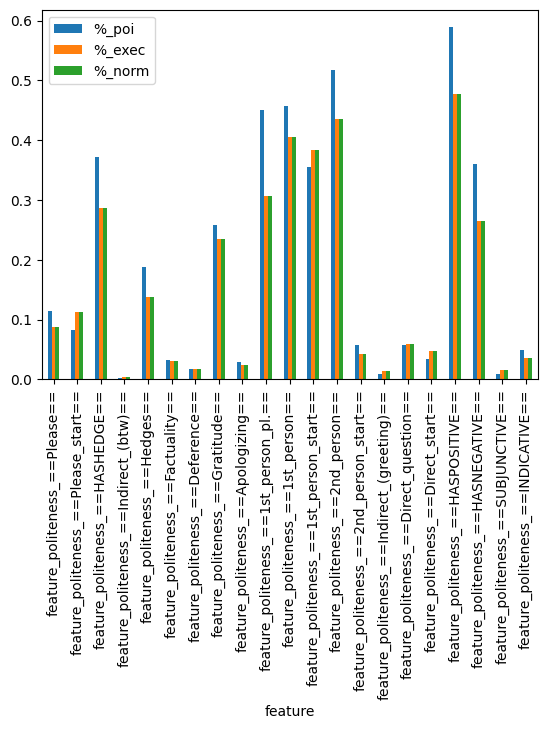

In [7]:
# plotting graph 
df.plot(x="feature", y=['%_poi', '%_exec', '%_norm'], kind="bar") 

In [9]:
! pwd

/home/mila/c/caleb.moses/comp-550/group-project/notebooks/Caleb


In [11]:
df1 = pd.read_csv("../../data/from_david/poi_emails.csv")[['Original Index', 'Politeness', 'Politeness Score', 'Date']]
df2 = pd.read_csv("../../data/from_david/exec_emails.csv")[['Original Index', 'Politeness', 'Politeness Score', 'Date']]
df3 = pd.read_csv("../../data/from_david/exec_emails.csv")[['Original Index', 'Politeness', 'Politeness Score', 'Date']]

In [12]:
poi_idx = df1['Original Index'].tolist()
exec_idx = df2['Original Index'].tolist()
norm_idx = df3['Original Index'].tolist()

dft = pd.concat([df1, df2, df3]).set_index("Original Index").sort_index()

In [13]:
dft['Datetime'] = pd.to_datetime(dft['Date'])

In [14]:
dft['Week'] = dft['Datetime'].apply(lambda x: x.week)
dft['Month'] = dft['Datetime'].apply(lambda x: x.month)
dft['Year'] = dft['Datetime'].apply(lambda x: x.year)

In [15]:
a = dft.loc[poi_idx, ['Politeness', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()
b = dft.loc[exec_idx, ['Politeness', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()
c = dft.loc[norm_idx, ['Politeness', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()

In [16]:
d = a.join(b, how='outer', lsuffix='_poi', rsuffix='_exec')
e = d.join(c, how='outer').rename(columns={"Politeness": "Politeness_norm"})

In [17]:
import calendar
f = e.reset_index()
f['New Month'] = f['Month'].apply(lambda x: calendar.month_abbr[x])
f = f.rename(columns={'New Month': 'Month', 'Month':'Num Month'})
f = f[[col for col in f.columns if col != 'Num Month']]

In [18]:
f = f.set_index(['Year', 'Month'])

In [19]:
f.columns

Index(['Politeness_poi', 'Politeness_exec', 'Politeness_norm'], dtype='object')

In [20]:
f = f.rename(columns={'Politeness_poi': "POI", 'Politeness_exec': "Exec", 'Politeness_norm': "Normal"})

In [24]:
f

POI      Exec    Normal
Year Month                              
1999 Mar         NaN  0.000000  0.000000
     May         NaN  0.750000  0.750000
     Jun         NaN  0.500000  0.500000
     Jul         NaN  0.411765  0.411765
     Aug         NaN  0.312500  0.312500
     Sep         NaN  0.227273  0.227273
     Oct         NaN  0.350000  0.350000
     Nov         NaN  0.321429  0.321429
     Dec         NaN  0.254545  0.254545
2000 Jan    0.000000  0.320988  0.320988
     Feb    0.000000  0.279476  0.279476
     Mar    0.000000  0.207373  0.207373
     Apr    0.000000  0.192000  0.192000
     May    0.200000  0.226562  0.226562
     Jun    0.142857  0.298137  0.298137
     Jul    0.161765  0.300469  0.300469
     Aug    0.109375  0.273214  0.273214
     Sep    0.156863  0.247086  0.247086
     Oct    0.200000  0.282609  0.282609
     Nov    0.322581  0.304102  0.304102
     Dec    0.313433  0.229730  0.229730
2001 Jan    0.185185  0.288708  0.288708
     Feb    0.263158  0.300917  0.300917
     Mar    0.333333  0.251521  0.251521
     Apr    0.300000  0.308333  0.308333
     May    0.533333  0.269481  0.269481
     Jun    0.509091  0.290850  0.290850
     Jul    0.644444  0.226337  0.226337
     Aug    0.400000  0.289809  0.289809
     Sep    0.426667  0.273684  0.273684
     Oct    0.491525  0.285401  0.285401
     Nov    0.465116  0.346304  0.346304
     Dec    0.257143  0.209402  0.209402
2002 Jan    0.400000  0.169951  0.169951
     Feb         NaN  0.341772  0.341772

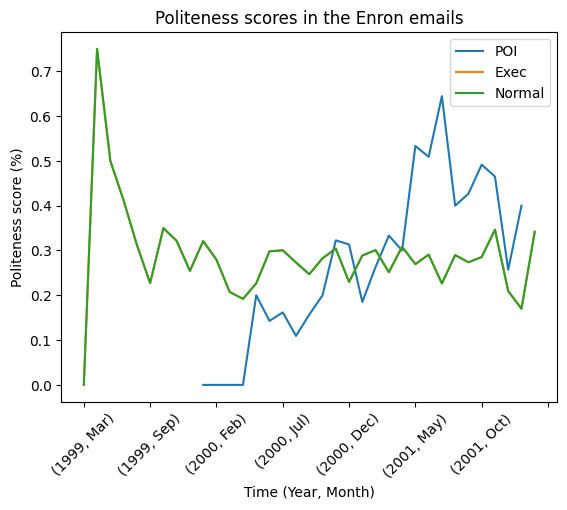

In [21]:
xlabel="Time (Year, Month)"
ylabel="Politeness score (%)"
title="Politeness scores in the Enron emails"
ax = f.plot(xlabel=xlabel, ylabel=ylabel, rot=45, title=title)
fig = ax.get_figure()
fig.savefig('q.png', pad_inches=1)
#         facecolor='auto', edgecolor='auto', backend=None,
#         **kwargs
#        )

In [381]:
df1 = pd.read_csv("../data/features/sentiment/poi_emails_sentiment.csv")[['Original Index', 'Sentiment', 'Sentiment Score', 'Date']]
df2 = pd.read_csv("../data/features/sentiment/exec_selected_emails_sentiment.csv")[['Original Index', 'Sentiment', 'Sentiment Score', 'Date']]
df3 = pd.read_csv("../data/features/sentiment/normal_selected_emails_sentiment.csv")[['Original Index', 'Sentiment', 'Sentiment Score', 'Date']]

In [382]:
poi_idx = df1['Original Index'].tolist()
exec_idx = df2['Original Index'].tolist()
norm_idx = df3['Original Index'].tolist()

dft = pd.concat([df1, df2, df3]).set_index("Original Index").sort_index()

In [383]:
dft['Datetime'] = pd.to_datetime(dft['Date'])

In [384]:
neg_idx = dft['Sentiment'] == 'NEGATIVE'

In [385]:
dft.loc[neg_idx, 'Sentiment Score'] = 1 - dft.loc[neg_idx, 'Sentiment Score']

In [386]:
dft

,Sentiment,Sentiment Score,Date,Datetime
Original Index,,,,
931,NEGATIVE,0.001229,"Tue, 12 Dec 2000 04:02:00",2000-12-12 04:02:00
2009,POSITIVE,0.996476,"Mon, 31 Dec 2001 10:53:43",2001-12-31 10:53:43
4555,POSITIVE,0.979234,"Wed, 2 May 2001 09:29:00",2001-05-02 09:29:00
5096,POSITIVE,0.998235,"Fri, 12 Oct 2001 05:45:56",2001-10-12 05:45:56
5268,NEGATIVE,0.007194,"Mon, 22 Oct 2001 06:22:25",2001-10-22 06:22:25
...,...,...,...,...
509059,POSITIVE,0.997900,"Thu, 23 Aug 2001 13:38:34",2001-08-23 13:38:34
515552,NEGATIVE,0.001843,"Wed, 30 May 2001 11:56:44",2001-05-30 11:56:44
515553,POSITIVE,0.998743,"Tue, 22 May 2001 12:53:43",2001-05-22 12:53:43


In [387]:
dft['Week'] = dft['Datetime'].apply(lambda x: x.week)
dft['Month'] = dft['Datetime'].apply(lambda x: x.month)
dft['Year'] = dft['Datetime'].apply(lambda x: x.year)

In [388]:
a = dft.loc[poi_idx, ['Sentiment Score', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()
b = dft.loc[exec_idx, ['Sentiment Score', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()
c = dft.loc[norm_idx, ['Sentiment Score', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()

In [389]:
d = a.join(b, how='outer', lsuffix='_poi', rsuffix='_exec')
e = d.join(c, how='outer').rename(columns={"Sentiment Score": "Sentiment Score_norm"})

In [390]:
import calendar
f = e.reset_index()
f['New Month'] = f['Month'].apply(lambda x: calendar.month_abbr[x])
f = f.rename(columns={'New Month': 'Month', 'Month':'Num Month'})
f = f[[col for col in f.columns if col != 'Num Month']]

In [391]:
f = f.set_index(['Year', 'Month'])

In [392]:
f = f.rename(columns={'Sentiment Score_poi': "POI", 'Sentiment Score_exec': "Exec", 'Sentiment Score_norm': "Normal"})

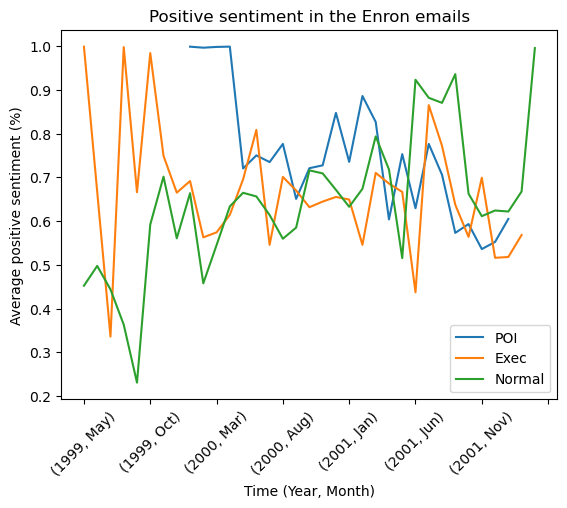

In [409]:
xlabel="Time (Year, Month)"
ylabel="Average positive sentiment (%)"
title="Positive sentiment in the Enron emails"
ax = f[[col for col in f.columns if col != "JJ"]].plot(xlabel=xlabel, ylabel=ylabel, title=title, rot=45)

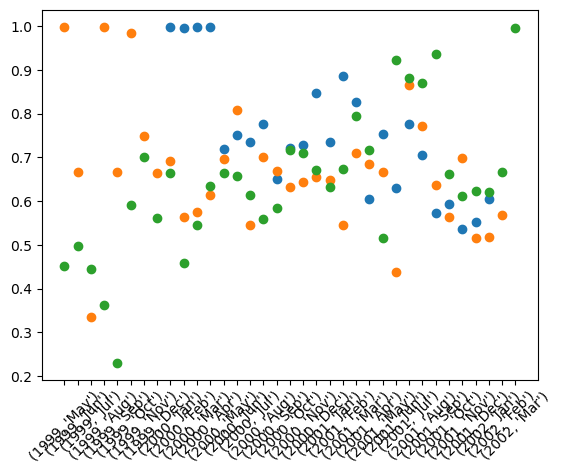

In [407]:
x = [str(i) for i in f.index]
y1 = f['POI']
y2 = f['Exec']
y3 = f['Normal']

plt.xticks(rotation=45)
# plt.xticks([x[i] for i in range(0, len(x), 2)])
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.scatter(x, y3)